# AE4465 (MM&A) - Lecture3 (Counting process)

Point processes are collections of random points falling in some space, such as time. Point processes provide the statistical language to describe the timing and properties of events. In maintenance, an event usually represents a failure event.

#### Definition of counting process
A stochastic process $${N(t),t∈[0,∞)}$$ is said to be a counting process if $N(t)$ is the number of events occurred from time $0$ up to and including time $t$. For a counting process, we assume
$$N(0)=0$$
$$N(t)∈{0,1,2,\ldots} \mbox{for all } t∈[0,∞)$$

for $0≤s<t$, $N(t)−N(s)$ shows the number of events that occur in the interval $(s,t]$

It is also important to provide two definitions.

#### Definition of independent increments
Let ${X(t),t∈[0,∞)}$ be a continuous-time random process. We say that $X(t)$ has independent increments if, for all $0≤t_1<t_2<t_3, \ldots <t_n$, the random variables $$ X(t_2)−X(t_1),X(t_3)−X(t_2),⋯,X(t_n)−X(t_{n−1}) $$ are independent.

If we know that a Poisson process has independent increaments we can say things such as:

$$P(2 \mbox{ arrivals in }(1,2] \mbox{ and  3 arrivals in } (3,5])=P(2 \mbox{ arrivals in } (1,2])⋅P(3\mbox{ arrivals in }(3,5])$$

#### Definition of stationary increaments

Let ${X(t),t∈[0,∞)}$ be a continuous-time random process. We say that $X(t)$ has stationary increments if, for all $t_2>t_1≥0$, and all $r>0$, the two random variables $$X(t_2)−X(t_1)$$ and $$X(t_2+r)−X(t_1+r)$$ have the same distributions. In other words, the distribution of the difference depends only on the length of the interval $(t1,t2]$, and not on the exact location of the interval on the real line.


## Example of Homogenous Poisson process (HPP)

Here is how the plot representing the Poisson probability distribution of number of failures occurring in the period of 1 month would look like:

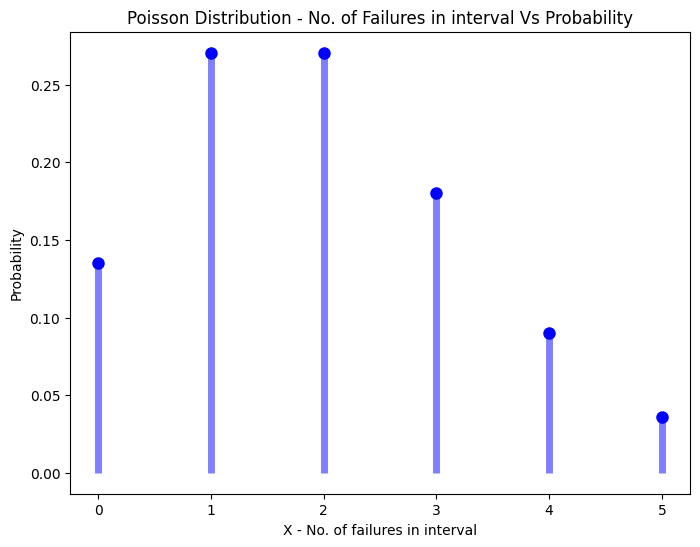

In [17]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
#
# Random variable representing number of failure events (occurrences)
# Mean number of occurences of failure events in 1 month is 5
#
X = [0, 1, 2, 3, 4, 5]
lmbda = 2
#
# Probability values
#
poisson_pd = poisson.pmf(X, lmbda)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability")
plt.xlabel("X - No. of failures in interval")
plt.title("Poisson Distribution - No. of Failures in interval Vs Probability")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)
plt.show()

### Simulating arrival times

If you have a Poisson process with rate parameter $\lambda$ (meaning that, on average, there are $\lambda$ arrivals per time period (e.g., second)), then the inter-arrival times are exponentially distributed with mean $1/\lambda$.

As python provides a function to generate exponentially distributed random numbers, you could simulate the first 50 events in a poisson process with an average rate of 3 events per month like this:

In [13]:
import random
inter_arrival_times = []
global_times = [0]
for i in range(1,50):
   inter_arrival_time = random.expovariate(lambd=3)
   inter_arrival_times.append(inter_arrival_time)
   last_global_time = global_times[-1]
   global_times.append(inter_arrival_time + last_global_time)
print(inter_arrival_times)
print(global_times)

[0.6095587254851141, 0.7599285762458196, 0.1754589019637823, 0.10926128212493787, 0.035727997121594766, 0.04258642905507131, 0.3415675765802591, 0.5070950738407627, 0.018542292874201925, 0.029377971951871182, 1.4935886019304638, 0.34448865508779636, 0.527997032208899, 0.15336250678086166, 0.11117421242851731, 0.19649842717872046, 0.29333289038239263, 0.21572830337656893, 0.24293468515915775, 0.2368033902201615, 0.05508062043033616, 0.14215442864574215, 0.5143846394318395, 0.15893648278905056, 0.002757673817430076, 0.13659685535093857, 0.037340638084514634, 0.15092073273015746, 0.5183392662001626, 1.162947784222124, 0.8118834654869995, 0.0015379650542722764, 0.08616793680905456, 0.07552999863398928, 0.06870582003830893, 0.1048224081024801, 0.417252401541133, 0.8010445371586518, 0.20585276199870073, 0.05134873848383889, 0.23200772047514115, 0.053865682913831654, 0.07134591089189221, 0.2212731901493679, 0.8661607463079285, 0.08050362948102356, 0.8362648306478087, 0.12664576325173107, 0.75

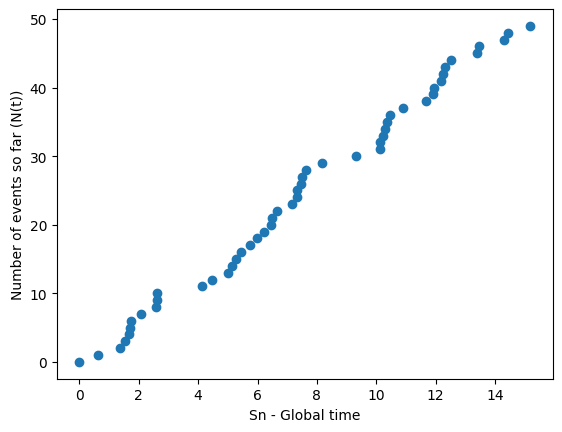

In [16]:
plt.scatter(global_times, range(len(global_times)))
plt.xlabel('Sn - Global time')
plt.ylabel('Number of events so far (N(t))')
plt.show()